# **Aura Najma Kustiananda | 164221053**

## Import Library dan Dataset

In [1]:
import wave
import numpy as np
np.random.seed(42)
import matplotlib.pyplot as plt
import os
import librosa as lr


datake = 0
file = os.listdir('./data datmin ii/set_b')[datake]
wav_file = wave.open('./data datmin ii/set_b/'+file, 'rb')

In [2]:
num_channels = wav_file.getnchannels()
sample_width = wav_file.getsampwidth()
frame_rate = wav_file.getframerate() # Samples per second
num_frames = wav_file.getnframes()
duration = num_frames / float(frame_rate) # dalam seconds
print(f"Channels: {num_channels}")
print(f"Sample Width: {sample_width} bytes")
print(f"Frame Rate: {frame_rate} Hz")
print(f"Number of frames: {num_frames}")
print(f"Duration: {duration:.2f} seconds")

Channels: 1
Sample Width: 2 bytes
Frame Rate: 4000 Hz
Number of frames: 42385
Duration: 10.60 seconds


## Membuat Feature Vector

In [3]:
frames = wav_file.readframes(num_frames) # membaca jumlah frame dari audio
wav_file.close() # menutup audio


In [4]:
audio_data = np.frombuffer(frames, dtype=np.int16)


In [5]:
if num_channels > 1:
 audio_data = np.reshape(audio_data, (-1, num_channels))

In [6]:
print("Audio Array:", audio_data)
print("Array Shape:", audio_data.shape)


Audio Array: [-204 -117   90 ...  495  575  594]
Array Shape: (42385,)


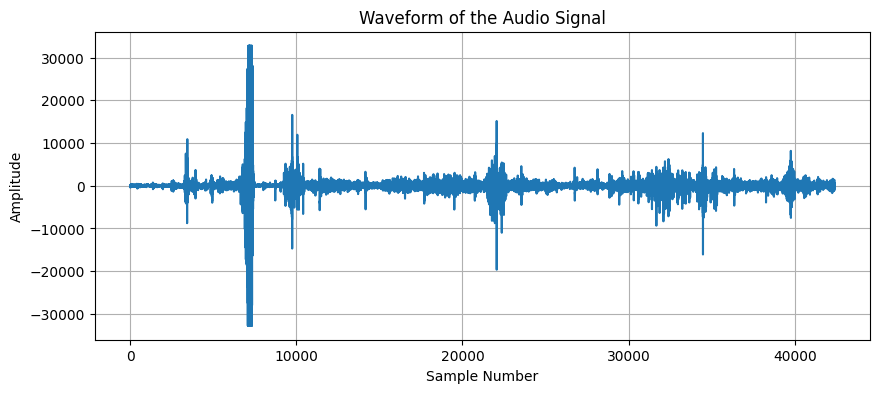

In [7]:
plt.figure(figsize=(10,4))
if num_channels > 1:
 plt.plot(audio_data[:, 0])
else:
 plt.plot(audio_data)
plt.title("Waveform of the Audio Signal")
plt.xlabel("Sample Number")
plt.ylabel("Amplitude")
plt.grid()
plt.show()

## Preprocessing

In [8]:
import librosa
audio_data = audio_data.astype(float)

mfcc_features = librosa.feature.mfcc(y=audio_data, sr=frame_rate, n_mfcc=13)


In [9]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
mfcc_scaled = scaler.fit_transform(mfcc_features.T) # Transpose so each row is

### UMAP

In [10]:
import umap
umap_reducer = umap.UMAP(n_components=2, n_jobs=1, random_state=42)
mfcc_umap = umap_reducer.fit_transform(mfcc_scaled)

Number of clusters: 2, Silhouette Score: 0.5203
Number of clusters: 3, Silhouette Score: 0.4313
Number of clusters: 4, Silhouette Score: 0.3933
Number of clusters: 5, Silhouette Score: 0.3866
Number of clusters: 6, Silhouette Score: 0.3614
Number of clusters: 7, Silhouette Score: 0.3677
Number of clusters: 8, Silhouette Score: 0.3526
Number of clusters: 9, Silhouette Score: 0.3618
Number of clusters: 10, Silhouette Score: 0.3869


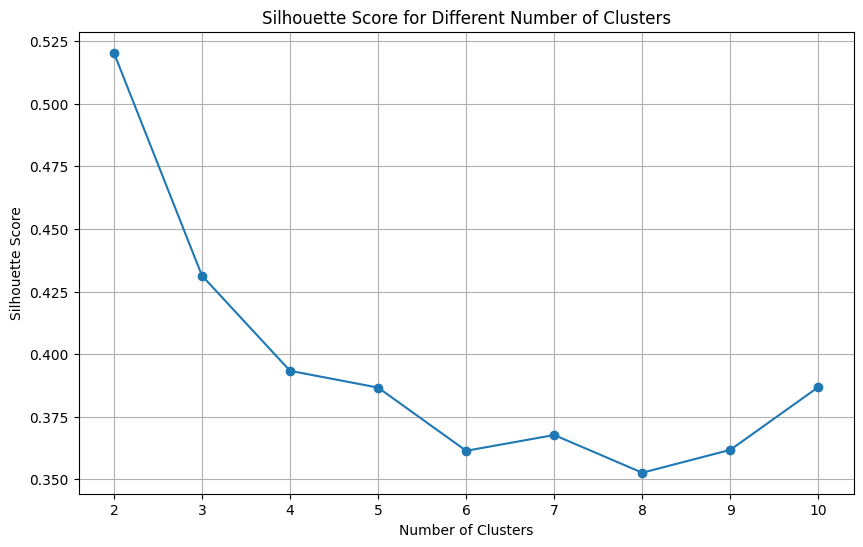

In [11]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
silhouette_scores = []
cluster_range = range(2, 11)  # Uji dari 2 hingga 10 cluster

for n_clusters in cluster_range:
    kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init='auto')
    y_kmeans = kmeans.fit_predict(mfcc_umap)
    
    silhouette_avg = silhouette_score(mfcc_umap, y_kmeans)
    silhouette_scores.append(silhouette_avg)
    print(f"Number of clusters: {n_clusters}, Silhouette Score: {silhouette_avg:.4f}")

# Visualisasi Silhouette Scores
plt.figure(figsize=(10, 6))
plt.plot(cluster_range, silhouette_scores, marker='o')
plt.title('Silhouette Score for Different Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.xticks(cluster_range)
plt.grid()
plt.show()


Semakin banyak clusternya semakin turun

Optimal number of clusters: 2


c:\Users\AURA\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


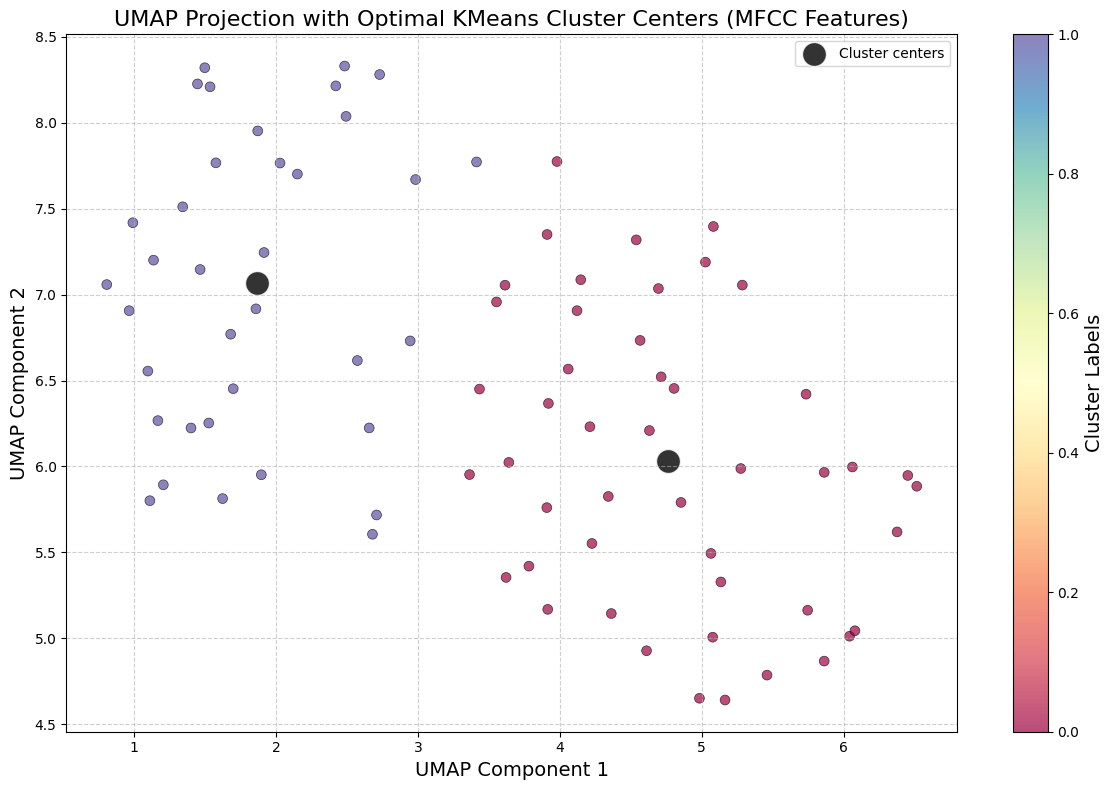

In [12]:
# Tentukan jumlah cluster optimal (gunakan yang memiliki Silhouette Score tertinggi)
optimal_n_clusters = cluster_range[np.argmax(silhouette_scores)]
print(f"Optimal number of clusters: {optimal_n_clusters}")

# Terapkan KMeans dengan jumlah cluster optimal
kmeans_optimal = KMeans(n_clusters=optimal_n_clusters, random_state=42)
y_kmeans_optimal = kmeans_optimal.fit_predict(mfcc_umap)
plt.figure(figsize=(12, 8))

# Scatter plot dengan transparansi dan ukuran titik yang lebih besar
scatter = plt.scatter(mfcc_umap[:, 0], mfcc_umap[:, 1], 
                      c=y_kmeans_optimal, 
                      cmap='Spectral', 
                      s=50,  # Ukuran titik yang lebih besar
                      alpha=0.7,  # Transparansi
                      edgecolor='k',  # Warna tepi
                      linewidth=0.5)

# Cluster centers
plt.scatter(kmeans_optimal.cluster_centers_[:, 0], 
            kmeans_optimal.cluster_centers_[:, 1], 
            c='black', s=300, alpha=0.8, label='Cluster centers', edgecolor='white')

# Memberikan judul dan label
plt.title('UMAP Projection with Optimal KMeans Cluster Centers (MFCC Features)', fontsize=16)
plt.xlabel('UMAP Component 1', fontsize=14)
plt.ylabel('UMAP Component 2', fontsize=14)

# Menambahkan grid
plt.grid(True, linestyle='--', alpha=0.6)

# Menambahkan colorbar untuk informasi
cbar = plt.colorbar(scatter)
cbar.set_label('Cluster Labels', fontsize=14)

# Menambahkan legend
plt.legend()
plt.tight_layout()  # Menyesuaikan layout agar lebih rapi
plt.show()


eps: 0.1, min_samples: 1, Silhouette Score: 0.0414
eps: 0.2, min_samples: 1, Silhouette Score: 0.2140
eps: 0.3, min_samples: 1, Silhouette Score: 0.3027
eps: 0.4, min_samples: 1, Silhouette Score: 0.1881
eps: 0.5, min_samples: 1, Silhouette Score: 0.0804
eps: 0.5, min_samples: 2, Silhouette Score: 0.0804
eps: 0.6, min_samples: 1, Silhouette Score: 0.4920
eps: 0.6, min_samples: 2, Silhouette Score: 0.4920
eps: 0.6, min_samples: 3, Silhouette Score: 0.4920
eps: 0.7, min_samples: 5, Silhouette Score: 0.4976
eps: 0.8, min_samples: 6, Silhouette Score: 0.5049
eps: 0.8, min_samples: 7, Silhouette Score: 0.5049
eps: 0.8, min_samples: 8, Silhouette Score: 0.5049
Best Silhouette Score: 0.5049 with eps: 0.8, min_samples: 6


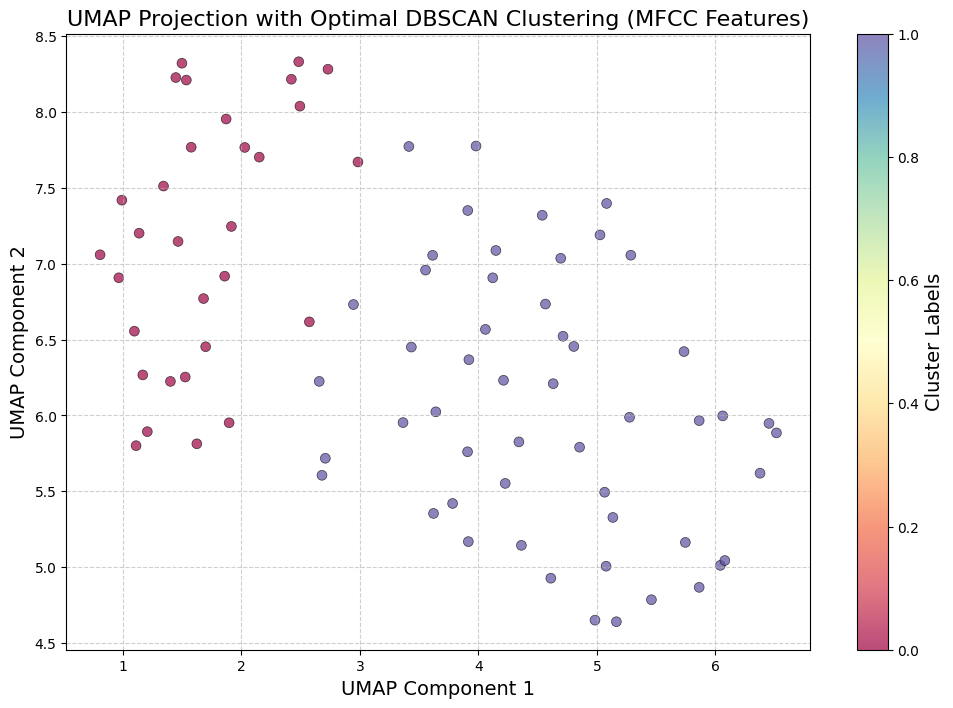

Number of clusters detected with optimal parameters: 2


In [13]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score

# Rentang nilai untuk eps dan min_samples
eps_values = np.arange(0.1, 1.1, 0.1)  # Dari 0.1 sampai 1.0
min_samples_values = range(1, 10)  # Dari 1 sampai 9

best_silhouette = -1  # Untuk menyimpan nilai terbaik
best_params = (None, None)  # Untuk menyimpan parameter terbaik

for eps in eps_values:
    for min_samples in min_samples_values:
        # Terapkan DBSCAN
        dbscan = DBSCAN(eps=eps, min_samples=min_samples)
        y_dbscan = dbscan.fit_predict(mfcc_umap)

        # Hanya menghitung silhouette score untuk cluster yang valid (bukan noise)
        if len(set(y_dbscan)) > 1 and -1 not in set(y_dbscan):
            silhouette_dbscan = silhouette_score(mfcc_umap, y_dbscan)
            print(f"eps: {eps:.1f}, min_samples: {min_samples}, Silhouette Score: {silhouette_dbscan:.4f}")

            # Simpan parameter terbaik
            if silhouette_dbscan > best_silhouette:
                best_silhouette = silhouette_dbscan
                best_params = (eps, min_samples)

# Hasil terbaik
print(f"Best Silhouette Score: {best_silhouette:.4f} with eps: {best_params[0]:.1f}, min_samples: {best_params[1]}")

# Terapkan DBSCAN dengan parameter terbaik
dbscan_best = DBSCAN(eps=best_params[0], min_samples=best_params[1])
y_dbscan_best = dbscan_best.fit_predict(mfcc_umap)

# Visualisasi hasil clustering DBSCAN terbaik
plt.figure(figsize=(12, 8))
scatter = plt.scatter(mfcc_umap[:, 0], mfcc_umap[:, 1], 
                      c=y_dbscan_best, 
                      cmap='Spectral', 
                      s=50, 
                      alpha=0.7, 
                      edgecolor='k', 
                      linewidth=0.5)

# Memberikan judul dan label
plt.title('UMAP Projection with Optimal DBSCAN Clustering (MFCC Features)', fontsize=16)
plt.xlabel('UMAP Component 1', fontsize=14)
plt.ylabel('UMAP Component 2', fontsize=14)

# Menambahkan grid
plt.grid(True, linestyle='--', alpha=0.6)

# Menambahkan colorbar untuk informasi
cbar = plt.colorbar(scatter)
cbar.set_label('Cluster Labels', fontsize=14)

# Menampilkan plot
plt.show()

# Menghitung dan mencetak jumlah cluster yang terdeteksi
n_clusters_best = len(set(y_dbscan_best)) - (1 if -1 in y_dbscan_best else 0)
print(f"Number of clusters detected with optimal parameters: {n_clusters_best}")


Clusters: 2, Affinity: nearest_neighbors, Silhouette Score: 0.5108
Clusters: 2, Affinity: rbf, Silhouette Score: 0.5203
Clusters: 3, Affinity: nearest_neighbors, Silhouette Score: 0.4266
Clusters: 3, Affinity: rbf, Silhouette Score: 0.4269
Clusters: 4, Affinity: nearest_neighbors, Silhouette Score: 0.3971
Clusters: 4, Affinity: rbf, Silhouette Score: 0.4029
Clusters: 5, Affinity: nearest_neighbors, Silhouette Score: 0.4083
Clusters: 5, Affinity: rbf, Silhouette Score: 0.3807
Best Silhouette Score: 0.5203 with 2 clusters and affinity 'rbf'


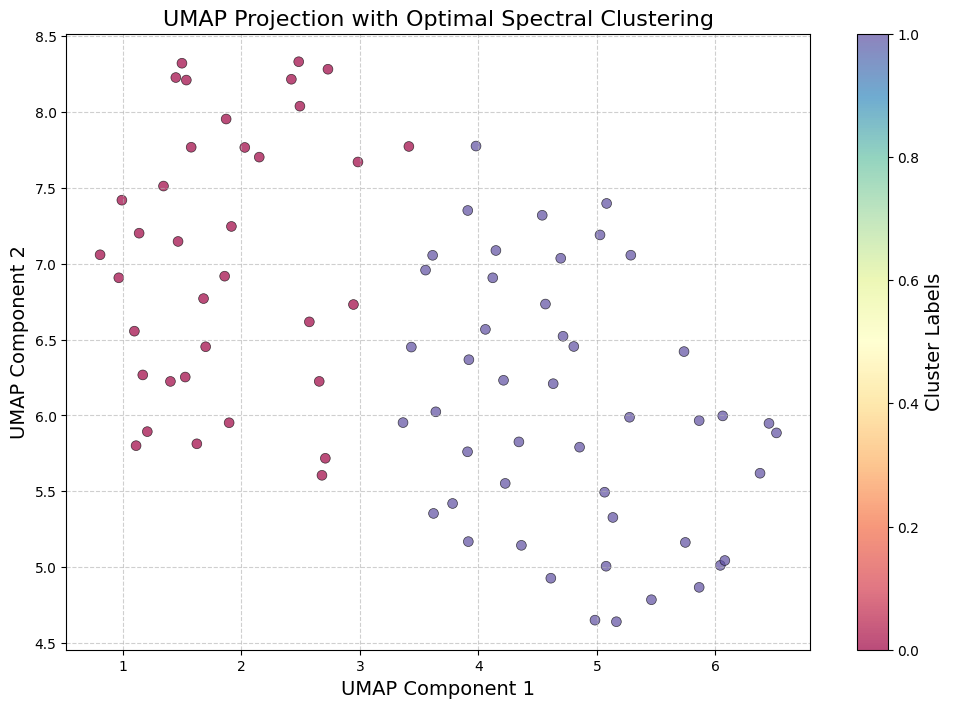

Number of clusters detected with optimal parameters: 2


In [21]:
from sklearn.cluster import SpectralClustering
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
n_clusters_values = [2, 3, 4, 5]
affinity_values = ['nearest_neighbors', 'rbf']
best_silhouette = -1
best_n_clusters = None
best_affinity = None
for n_clusters in n_clusters_values:
    for affinity in affinity_values:
        spectral = SpectralClustering(n_clusters=n_clusters, affinity=affinity, random_state=42)
        y_spectral = spectral.fit_predict(mfcc_umap)
        if len(set(y_spectral)) > 1:  # Pastikan ada lebih dari 1 cluster
            silhouette_spectral = silhouette_score(mfcc_umap, y_spectral)
            print(f"Clusters: {n_clusters}, Affinity: {affinity}, Silhouette Score: {silhouette_spectral:.4f}")
            if silhouette_spectral > best_silhouette:
                best_silhouette = silhouette_spectral
                best_n_clusters = n_clusters
                best_affinity = affinity
if best_n_clusters is not None:
    print(f"Best Silhouette Score: {best_silhouette:.4f} with {best_n_clusters} clusters and affinity '{best_affinity}'")
    spectral_best = SpectralClustering(n_clusters=best_n_clusters, affinity=best_affinity, random_state=42)
    y_spectral_best = spectral_best.fit_predict(mfcc_umap)
    plt.figure(figsize=(12, 8))
    scatter = plt.scatter(mfcc_umap[:, 0], mfcc_umap[:, 1], 
                          c=y_spectral_best, 
                          cmap='Spectral', 
                          s=50, 
                          alpha=0.7, 
                          edgecolor='k', 
                          linewidth=0.5)
    plt.title('UMAP Projection with Optimal Spectral Clustering', fontsize=16)
    plt.xlabel('UMAP Component 1', fontsize=14)
    plt.ylabel('UMAP Component 2', fontsize=14)
    plt.grid(True, linestyle='--', alpha=0.6)
    cbar = plt.colorbar(scatter)
    cbar.set_label('Cluster Labels', fontsize=14)
    plt.show()
    n_clusters_best = len(set(y_spectral_best)) - (1 if -1 in y_spectral_best else 0)
    print(f"Number of clusters detected with optimal parameters: {n_clusters_best}")
else:
    print("Tidak ada parameter yang valid ditemukan.")


### PCA

In [15]:
from sklearn.decomposition import PCA

# Reduksi dimensi menggunakan PCA
pca = PCA(n_components=2, random_state=42)
mfcc_pca = pca.fit_transform(mfcc_scaled)


Silhouette Score with 2 clusters: 0.4461
Silhouette Score with 3 clusters: 0.4694
Silhouette Score with 4 clusters: 0.3833
Silhouette Score with 5 clusters: 0.3522
Silhouette Score with 6 clusters: 0.3625
Silhouette Score with 7 clusters: 0.3402
Silhouette Score with 8 clusters: 0.3783
Silhouette Score with 9 clusters: 0.3669
Silhouette Score with 10 clusters: 0.3830
Optimal number of clusters: 3


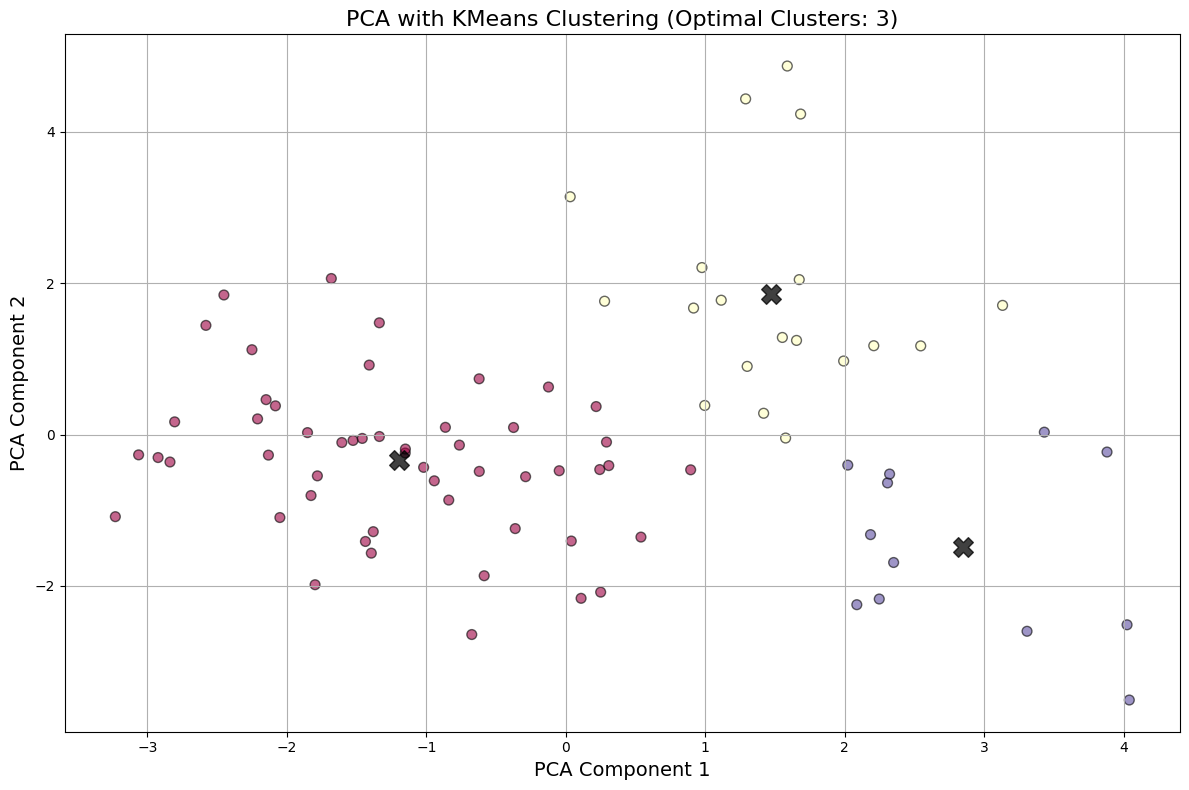

In [19]:
cluster_range = range(2, 11)  
silhouette_scores = []
for n_clusters in cluster_range:
    kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init='auto')
    y_kmeans = kmeans.fit_predict(mfcc_pca)
    silhouette = silhouette_score(mfcc_pca, y_kmeans)
    silhouette_scores.append(silhouette)
for n, score in zip(cluster_range, silhouette_scores):
    print(f'Silhouette Score with {n} clusters: {score:.4f}')
optimal_n_clusters = cluster_range[np.argmax(silhouette_scores)]
print(f'Optimal number of clusters: {optimal_n_clusters}')
kmeans_best = KMeans(n_clusters=optimal_n_clusters, random_state=42, n_init='auto')
y_kmeans_best = kmeans_best.fit_predict(mfcc_pca)
plt.figure(figsize=(12, 8))
plt.scatter(mfcc_pca[:, 0], mfcc_pca[:, 1], 
            c=y_kmeans_best, 
            cmap='Spectral', 
            s=50, 
            alpha=0.6, 
            edgecolor='k')
plt.scatter(kmeans_best.cluster_centers_[:, 0], 
            kmeans_best.cluster_centers_[:, 1], 
            c='black', 
            s=200, 
            alpha=0.75, 
            marker='X')
plt.title(f'PCA with KMeans Clustering (Optimal Clusters: {optimal_n_clusters})', fontsize=16)
plt.xlabel('PCA Component 1', fontsize=14)
plt.ylabel('PCA Component 2', fontsize=14)
plt.grid(True)
plt.tight_layout()
plt.show()


In [17]:

# Variasi parameter DBSCAN
eps_values = [0.2, 0.5, 0.7, 1.0]
min_samples_values = [2, 5, 10]

# Mencatat silhouette scores untuk setiap kombinasi
silhouette_scores = []

plt.figure(figsize=(15, 10))

for eps in eps_values:
    for min_samples in min_samples_values:
        # Menggunakan DBSCAN
        dbscan = DBSCAN(eps=eps, min_samples=min_samples)
        y_dbscan = dbscan.fit_predict(mfcc_pca)

        # Hitung silhouette score hanya untuk cluster yang valid
        if len(set(y_dbscan)) > 1 and -1 not in set(y_dbscan):
            silhouette = silhouette_score(mfcc_pca, y_dbscan)
            silhouette_scores.append((eps, min_samples, silhouette))
            print(f"DBSCAN (eps={eps}, min_samples={min_samples}) Silhouette Score: {silhouette:.4f}")

            # Visualisasi hasil clustering
            plt.subplot(len(eps_values), len(min_samples_values), len(min_samples_values) * eps_values.index(eps) + (min_samples_values.index(min_samples) + 1))
            plt.scatter(mfcc_pca[:, 0], mfcc_pca[:, 1], c=y_dbscan, cmap='Spectral', s=50, alpha=0.7, edgecolor='k', linewidth=0.5)
            plt.title(f'DBSCAN (eps={eps}, min_samples={min_samples})')
            plt.xlabel('PCA Component 1')
            plt.ylabel('PCA Component 2')
            plt.grid(True)
        else:
            print(f"DBSCAN (eps={eps}, min_samples={min_samples}) did not produce valid clusters.")

# Tampilkan semua subplot
plt.tight_layout()
plt.show()

# Menemukan parameter terbaik berdasarkan silhouette score
if silhouette_scores:
    best_params = max(silhouette_scores, key=lambda x: x[2])
    print(f"Best DBSCAN parameters: eps={best_params[0]}, min_samples={best_params[1]} with Silhouette Score: {best_params[2]:.4f}")
else:
    print("No valid clusters found for any parameter combination.")


DBSCAN (eps=0.2, min_samples=2) did not produce valid clusters.
DBSCAN (eps=0.2, min_samples=5) did not produce valid clusters.
DBSCAN (eps=0.2, min_samples=10) did not produce valid clusters.
DBSCAN (eps=0.5, min_samples=2) did not produce valid clusters.
DBSCAN (eps=0.5, min_samples=5) did not produce valid clusters.
DBSCAN (eps=0.5, min_samples=10) did not produce valid clusters.
DBSCAN (eps=0.7, min_samples=2) did not produce valid clusters.
DBSCAN (eps=0.7, min_samples=5) did not produce valid clusters.
DBSCAN (eps=0.7, min_samples=10) did not produce valid clusters.
DBSCAN (eps=1.0, min_samples=2) did not produce valid clusters.
DBSCAN (eps=1.0, min_samples=5) did not produce valid clusters.
DBSCAN (eps=1.0, min_samples=10) did not produce valid clusters.


<Figure size 1500x1000 with 0 Axes>

No valid clusters found for any parameter combination.


Spectral Clustering (n_clusters=2, affinity='nearest_neighbors') Silhouette Score: 0.4377
Spectral Clustering (n_clusters=2, affinity='rbf') Silhouette Score: 0.4377
Spectral Clustering (n_clusters=3, affinity='nearest_neighbors') Silhouette Score: 0.3260
Spectral Clustering (n_clusters=3, affinity='rbf') Silhouette Score: 0.4477
Spectral Clustering (n_clusters=4, affinity='nearest_neighbors') Silhouette Score: 0.3755
Spectral Clustering (n_clusters=4, affinity='rbf') Silhouette Score: 0.4439
Spectral Clustering (n_clusters=5, affinity='nearest_neighbors') Silhouette Score: 0.3476
Spectral Clustering (n_clusters=5, affinity='rbf') Silhouette Score: 0.4211
Best Spectral Clustering parameters: n_clusters=3, affinity='rbf' with Silhouette Score: 0.4477


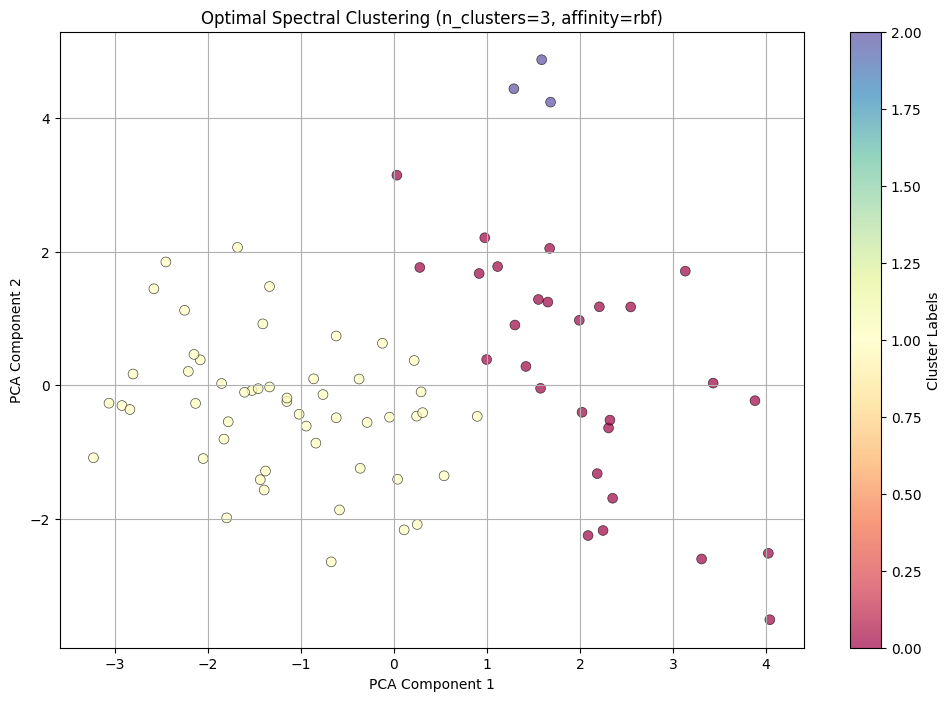

In [23]:
from sklearn.cluster import SpectralClustering
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt


n_clusters_values = [2, 3, 4, 5]
affinity_values = ['nearest_neighbors', 'rbf']
silhouette_scores = []
best_silhouette = -1
best_params = None
for n_clusters in n_clusters_values:
    for affinity in affinity_values:
        spectral = SpectralClustering(n_clusters=n_clusters, affinity=affinity, random_state=42)
        y_spectral = spectral.fit_predict(mfcc_pca)
        if len(set(y_spectral)) > 1:
            silhouette = silhouette_score(mfcc_pca, y_spectral)
            silhouette_scores.append((n_clusters, affinity, silhouette))
            print(f"Spectral Clustering (n_clusters={n_clusters}, affinity='{affinity}') Silhouette Score: {silhouette:.4f}")
            if silhouette > best_silhouette:
                best_silhouette = silhouette
                best_params = (n_clusters, affinity, y_spectral)
if best_params:
    print(f"Best Spectral Clustering parameters: n_clusters={best_params[0]}, affinity='{best_params[1]}' with Silhouette Score: {best_silhouette:.4f}")
    plt.figure(figsize=(12, 8))
    plt.scatter(mfcc_pca[:, 0], mfcc_pca[:, 1], 
                c=best_params[2], 
                cmap='Spectral', 
                s=50, 
                alpha=0.7, 
                edgecolor='k', 
                linewidth=0.5)
    plt.title(f'Optimal Spectral Clustering (n_clusters={best_params[0]}, affinity={best_params[1]})')
    plt.xlabel('PCA Component 1')
    plt.ylabel('PCA Component 2')
    plt.grid(True)
    plt.colorbar(label='Cluster Labels')
    plt.show()
else:
    print("No valid clusters found for any parameter combination.")
